In [1]:
import os
from itertools import product
import config
import json
import pandas as pd

import seaborn as sns


In [2]:
jobs = list(product(config.datasets, config.model_types, config.curricula))

def get_df(dataset, model_type, curriculum):
    model = os.path.join(dataset + ("_" + model_type) + "_" + curriculum.split(".")[0])
    blimp_out_path = f"./eval/blimp/{os.path.basename(model)}/blimp_results.json"


    print(model)
    df = None
    with open(blimp_out_path) as f:
        d = json.load(f)
        print(d)

    df = pd.DataFrame(d["results"]).T

    df.index.name="metric"
    df = df.drop("alias", axis=1)
    df.columns = [col.replace(',none', '').replace("acc_stderr", "std") for col in df.columns]
    df = df.loc[~df.index.isin(["blimp_supplement", "blimp_filtered"]),:]
    df[["model", "dataset", "model_type", "curriculum"]] = model, dataset, model_type, curriculum
    return df

df = pd.concat((get_df(*job) for job in jobs))
df

loris3/babylm_2024_10m_curriculum_llama_random
{'results': {'blimp_supplement': {'acc,none': 0.4987489050431586, 'acc_stderr,none': 0.006744233941371524, 'alias': 'blimp_supplement'}, 'blimp_supplement_hypernym': {'acc,none': 0.48812351543942994, 'acc_stderr,none': 0.01723651480046606, 'alias': ' - blimp_supplement_hypernym'}, 'blimp_supplement_qa_congruence_easy': {'acc,none': 0.59375, 'acc_stderr,none': 0.061876853828249374, 'alias': ' - blimp_supplement_qa_congruence_easy'}, 'blimp_supplement_qa_congruence_tricky': {'acc,none': 0.3151515151515151, 'acc_stderr,none': 0.0362773057502241, 'alias': ' - blimp_supplement_qa_congruence_tricky'}, 'blimp_supplement_subject_aux_inversion': {'acc,none': 0.6252909231962762, 'acc_stderr,none': 0.007784975391283619, 'alias': ' - blimp_supplement_subject_aux_inversion'}, 'blimp_supplement_turn_taking': {'acc,none': 0.4714285714285714, 'acc_stderr,none': 0.029885304852499663, 'alias': ' - blimp_supplement_turn_taking'}, 'blimp_filtered': {'acc,none

,acc,std,model,dataset,model_type,curriculum
metric,,,,,,
blimp_supplement_hypernym,0.488124,0.017237,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_easy,0.59375,0.061877,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_tricky,0.315152,0.036277,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_subject_aux_inversion,0.625291,0.007785,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_turn_taking,0.471429,0.029885,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
...,...,...,...,...,...,...
blimp_wh_questions_subject_gap_long_distance_filtered,0.847141,0.012299,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_wh_vs_that_no_gap_filtered,0.824623,0.012968,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_wh_vs_that_no_gap_long_distance_filtered,0.910857,0.009639,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt


<Axes: xlabel='model', ylabel='acc'>

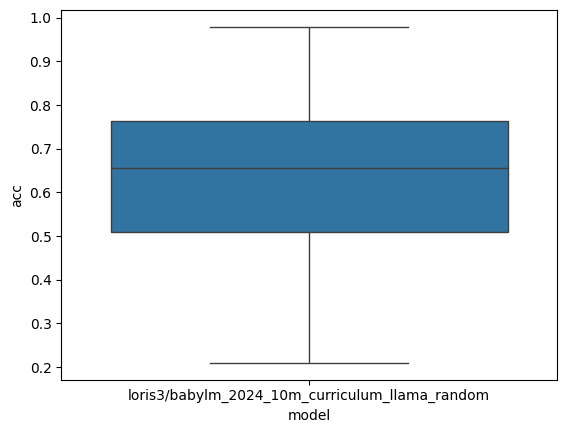

In [3]:
sns.boxplot(x="model", y='acc', data=df)